In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
imdb_data = pd.read_csv('IMDB Dataset.csv')

imdb_data.columns = ['review', 'sentiment']

label_encoder = LabelEncoder()
imdb_data['sentiment_encoded'] = label_encoder.fit_transform(imdb_data['sentiment'])

In [3]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(imdb_data['review'])
sequences = tokenizer.texts_to_sequences(imdb_data['review'])

max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, imdb_data['sentiment_encoded'], test_size=0.2, random_state=42)

model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    LSTM(128,return_sequences=True),
    Dropout(0.5),
    LSTM(64,return_sequences=True),
    Dropout(0.25),
    LSTM(32),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 45ms/step - accuracy: 0.5059 - loss: 0.6944 - val_accuracy: 0.5039 - val_loss: 0.6931
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 46ms/step - accuracy: 0.4985 - loss: 0.6933 - val_accuracy: 0.4961 - val_loss: 0.6931
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.5399 - loss: 0.6751 - val_accuracy: 0.7236 - val_loss: 0.5325
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 46ms/step - accuracy: 0.7931 - loss: 0.4638 - val_accuracy: 0.8440 - val_loss: 0.3603
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 46ms/step - accuracy: 0.8706 - loss: 0.3196 - val_accuracy: 0.8615 - val_loss: 0.3345
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 46ms/step - accuracy: 0.8914 - loss: 0.2741 - val_accuracy: 0.8564 - val_loss: 0.3297
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 47ms/step - accuracy: 0.9107 - loss: 0.2340 - val_accuracy: 0.8603 - val_loss: 0.3465
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 61s 49ms/step - accuracy: 0.9207 -

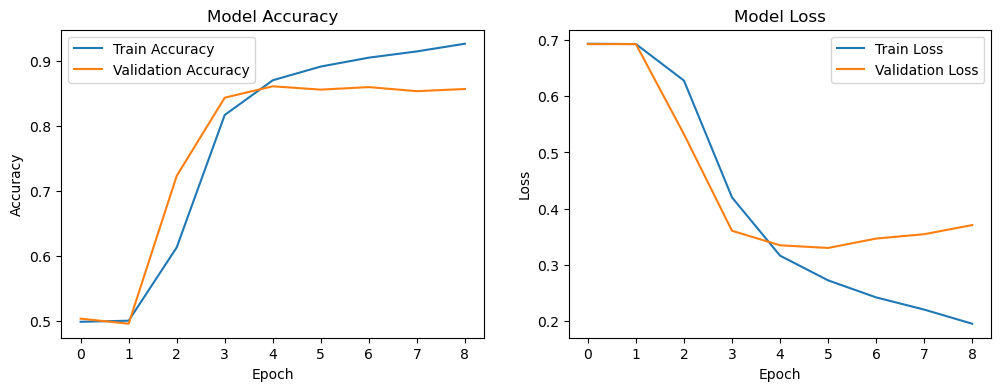

In [6]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [7]:
def predict_sentiment(text,model,tokenizer,max_length=100):
    for i in text:
        sequence = tokenizer.texts_to_sequences([i])
        padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    
        prediction = model.predict(padded_sequence)
    
        sentiment = 'Positive' if prediction[0] > 0.5 else 'Negative'
        print(f"Text : {i} --> Sentiment: {sentiment}")
test_samples=["The movie is fun to watch","Watching this movie is waste of time","I enjoy this movie","Worst movie of the year"]
predict_sentiment(test_samples, model, tokenizer)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
Text : The movie is fun to watch --> Sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Text : Watching this movie is waste of time --> Sentiment: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Text : I enjoy this movie --> Sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Text : Worst movie of the year --> Sentiment: Negative
